# Predicting Profit of the Companies 


## The Data Analysis Problem
   
Company profit detection dataset serves several important purposes and can be valuable for various stakeholders, 
including business owners ,investors, analysts, and policymakers.It can be useful for Performance Evaluation,Financial 
Planning and Forecasting,Investment Decisions,and Risk Management.
   
Variable | Description
----------|--------------
R&D Spend | Amount of money spent by the company on research and development activities
Administration |  Company's expenditure on administrative activities
Marketing Spend | Amount of money allocated by the company for marketing purposes.
State | The state in which the company is located.
Profit | The net profit earned by the company during a specific period


### Importing the necessary module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Read the data

In [2]:
companies = pd.read_csv('1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
companies.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### Exploring size of data and variable types

In [4]:
companies.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [5]:
companies.shape

(1000, 5)

In [6]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [7]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### Exploring of values in the dataset

### Split the data into X and Y

In [8]:
X = companies.iloc[:,:-1]
Y = companies.iloc[:, 4]
X

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.800,471784.1000,New York
1,162597.70,151377.590,443898.5300,California
2,153441.51,101145.550,407934.5400,Florida
3,144372.41,118671.850,383199.6200,New York
4,142107.34,91391.770,366168.4200,Florida
...,...,...,...,...
995,54135.00,118451.999,173232.6695,California
996,134970.00,130390.080,329204.0228,California
997,100275.47,241926.310,227142.8200,California
998,128456.23,321652.140,281692.3200,California


In [9]:
Y

0      192261.83000
1      191792.06000
2      191050.39000
3      182901.99000
4      166187.94000
           ...     
995     95279.96251
996    164336.60550
997    413956.48000
998    333962.19000
999    476485.43000
Name: Profit, Length: 1000, dtype: float64

In [10]:
X.iloc[:,3]

0        New York
1      California
2         Florida
3        New York
4         Florida
          ...    
995    California
996    California
997    California
998    California
999      New York
Name: State, Length: 1000, dtype: object

In [11]:
companies.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
labelencoder = LabelEncoder()
X.iloc[:, 3] = labelencoder.fit_transform(X.iloc[:, 3])

# Use ColumnTransformer to apply one-hot encoding to the specific column
# Specify the column(s) to be one-hot encoded in the transformers parameter
column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), [3])],  # One-hot encode column 3
    remainder='passthrough'  # Preserve other columns
)

X= column_transformer.fit_transform(X)
print(X)

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6534920e+05 1.3689780e+05
  4.7178410e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.6259770e+05 1.5137759e+05
  4.4389853e+05]
 [0.0000000e+00 1.0000000e+00 0.0000000e+00 1.5344151e+05 1.0114555e+05
  4.0793454e+05]
 ...
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.0027547e+05 2.4192631e+05
  2.2714282e+05]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 1.2845623e+05 3.2165214e+05
  2.8169232e+05]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6118172e+05 2.7093986e+05
  2.9544217e+05]]


### Heatmap

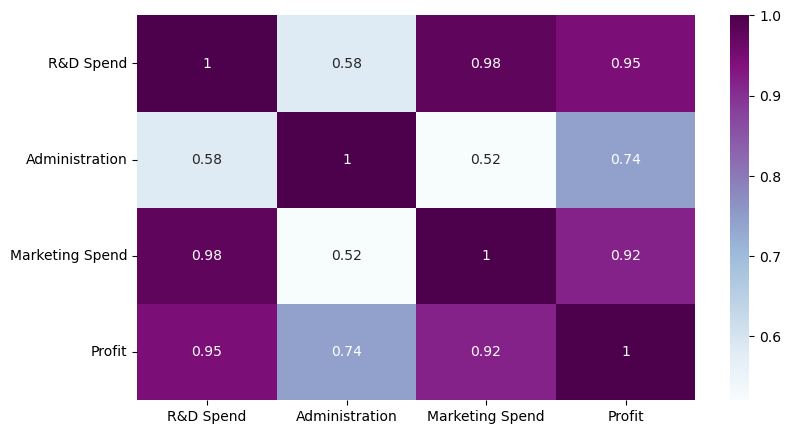

In [13]:
corr=companies.corr(numeric_only=True) 
plt.figure(figsize=(9,5))
sns.heatmap(corr, annot = True, cmap="BuPu") 
plt.show()


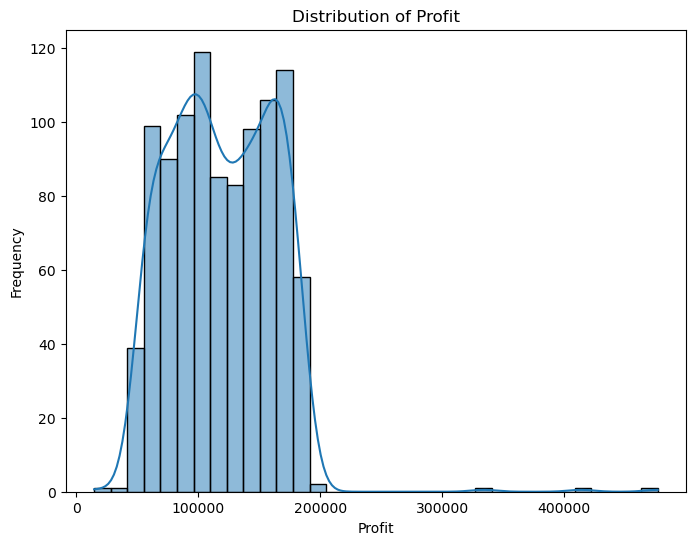

In [14]:
# Histogram for Profit variable
plt.figure(figsize=(8, 6))
sns.histplot(data=companies, x='Profit', kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()


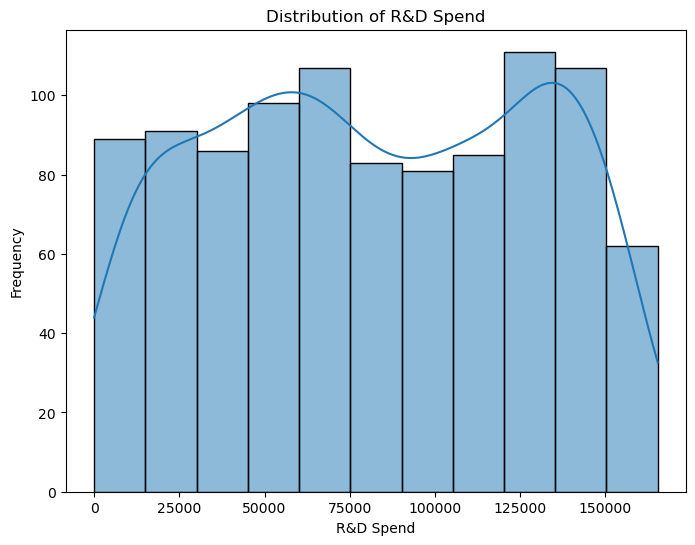

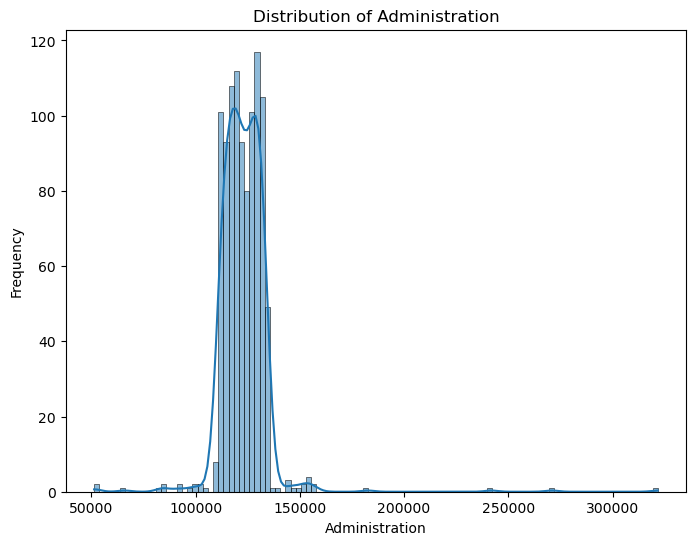

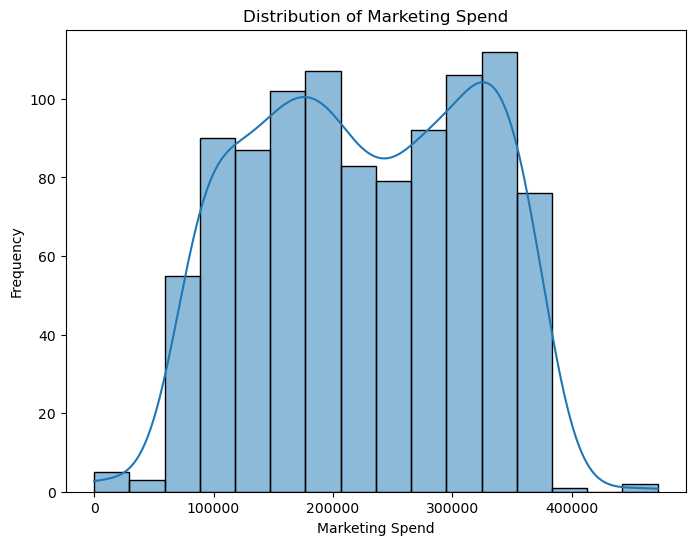

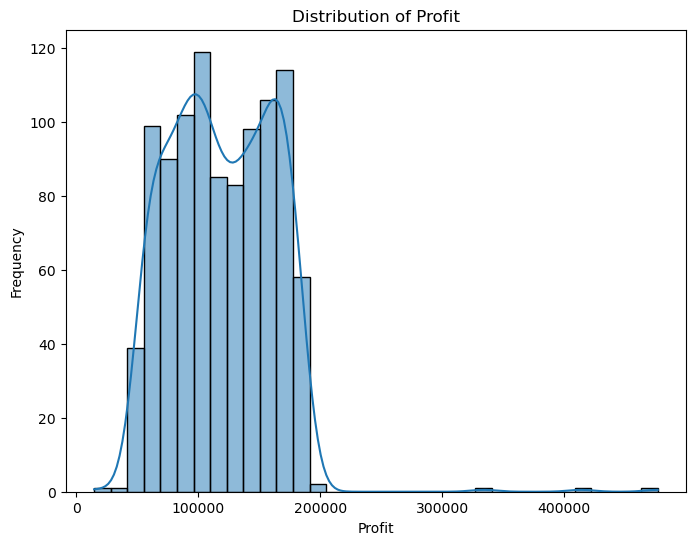

In [15]:
# Plotting histograms for numerical features
numerical_features = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=companies, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

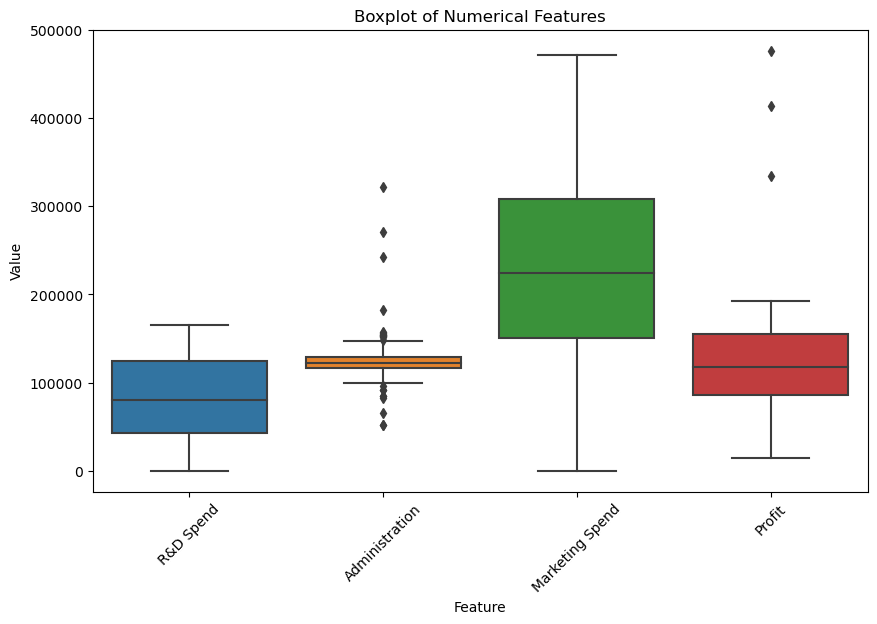

In [16]:
# Plotting boxplots for numerical features

plt.figure(figsize=(10, 6))
sns.boxplot(data=companies[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


## Linear regression

In [17]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

regressor = LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression()

In [18]:
y_pred = regressor.predict(X_test)
y_pred

array([124953.7996469 , 111734.4950316 ,  90901.26364246, 127455.94292207,
       161129.99124217,  90972.77173954, 154891.79921465, 139296.99831535,
        88028.04031292,  90667.78522922, 167567.44512269, 162870.30933751,
       104468.85237494, 108151.33521543,  91156.28051896, 159354.34982184,
       116792.61755437, 104673.06302735, 120511.90141857, 105579.62753158,
        75617.72527019, 125867.25652506,  64489.78255518,  70121.93853858,
       170731.05792007, 164029.94702986, 178604.70505217, 135581.8016896 ,
       121706.61701266, 162688.7689977 , 145511.31239214, 113471.14631659,
       165275.7391364 , 141803.22871506,  64513.04425429,  88933.74337007,
        82148.86670558,  74213.40921359, 116876.82828018, 170635.42667681,
        59635.84593443,  88218.41683724, 120923.47393602, 142173.47183749,
       168989.01681667, 146927.44477359, 152810.08926217, 138823.79020677,
       142008.0554969 ,  74584.51377479, 114481.09611289,  61817.27425639,
       171089.43534572, 1

### Evaluating the model

In [19]:
# Calculating evaluation metrics
mse = mean_squared_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred, squared=False)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 30775142.856771432
Root Mean Squared Error (RMSE): 5547.53484502544
Mean Absolute Error (MAE): 1404.4378483072196
R-squared (R^2): 0.9825277846008217
